# TP1 - Pandas y Visualización de datos

1) Realizar dos visualizaciones para cada uno de los tres datasets que elija de los que le brindamos. Las visualizaciones deben incluir o ayudar a explicar la variable indicada encontrando alguna relación interesante con ella (esto es excluyente). Además se debe realizar almenos un plot de cada uno de los siguientes tipos:

*   Bar plot (o sus variaciones)
*   Histograma o Density plot
*   Violin plot
*   Box plot
*   Heatmap

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
playstore_original = pd.read_csv("/content/drive/MyDrive/Organización de Datos/TP1/Datasets/googleplaystore.csv")

Text(0, 0.5, 'Rating')

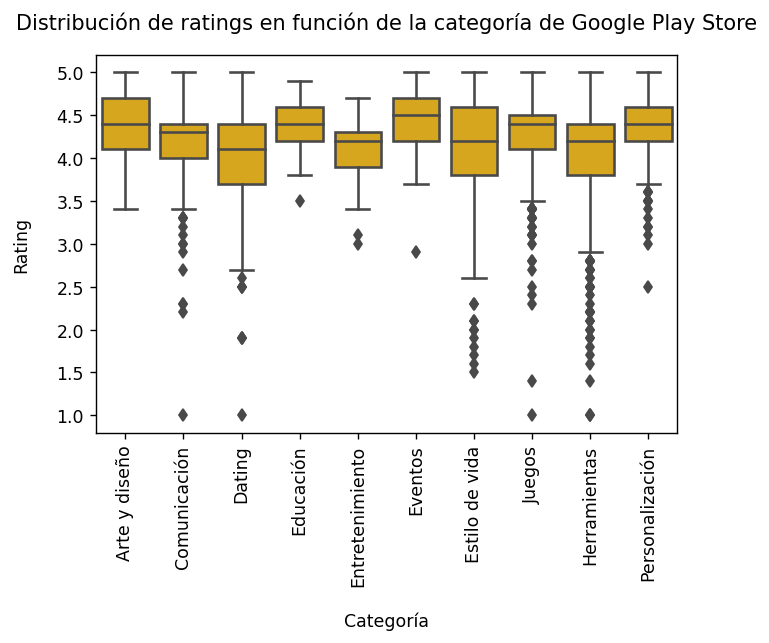

In [4]:
#Distribución de ratings en el top 10 de categorías de Google Play Store

playstore = playstore_original.dropna()

def parsear_installs(cantidad):
  cantidad = cantidad.rstrip("+")
  return cantidad.replace(",", "")

top10_categorias = ["EDUCATION", "TOOLS", "ENTERTAINMENT", "GAME", "LIFESTYLE", "DATING", "EVENTS", "COMMUNICATION", "ART_AND_DESIGN", "PERSONALIZATION"]
playstore = playstore[playstore["Category"].isin(top10_categorias)]

traduccion = {"EDUCATION":"Educación", "TOOLS":"Herramientas", "ENTERTAINMENT":"Entretenimiento", "GAME":"Juegos", "LIFESTYLE":"Estilo de vida", 
              "DATING":"Dating", "EVENTS":"Eventos", "COMMUNICATION":"Comunicación", "ART_AND_DESIGN":"Arte y diseño", "PERSONALIZATION":"Personalización"}
playstore["Category"] = playstore["Category"].map(traduccion)

plt.figure(dpi=125)
sns.boxplot(data=playstore, x="Category", y="Rating", palette=["#F4B400"])
plt.title("Distribución de ratings en función de la categoría de Google Play Store", pad=15)
plt.xticks(rotation=90)
plt.xlabel("Categoría", labelpad=15)
plt.ylabel("Rating", labelpad=15)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


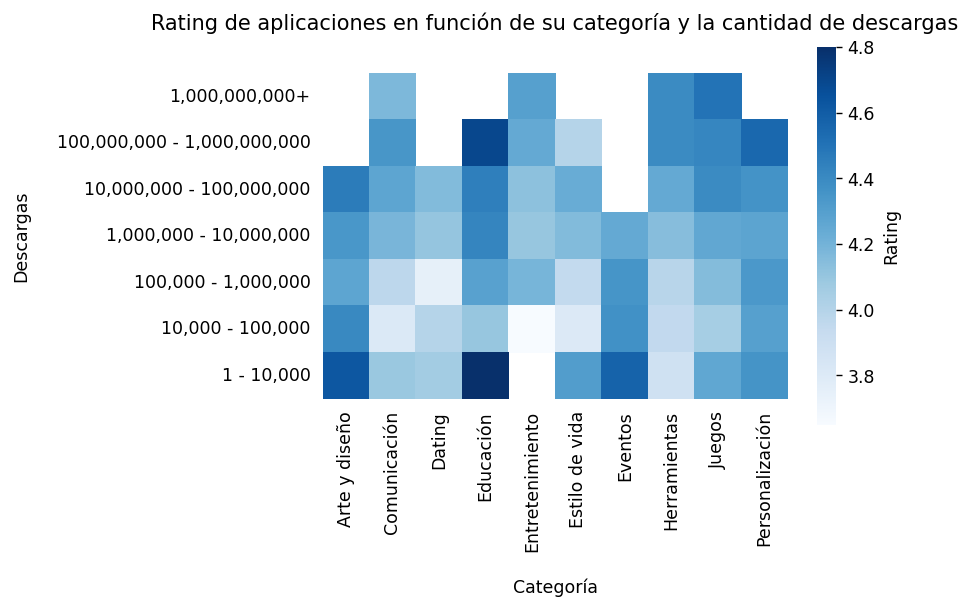

In [54]:
#Heatmap del rating de aplicaciones en función de su categoría y cantidad de descargas

playstore = playstore_original.dropna()

def cambiar_descargas(descargas):
  if descargas in ("1+", "10+", "100+", "50+", "500+", "1,000+", "5+", "5,000+"):
    return "1 - 10,000"
  elif descargas in ("50,000+", "10,000+"):
    return "10,000 - 100,000"
  elif descargas in ("500,000+", "100,000+"):
    return "100,000 - 1,000,000"
  elif descargas in ("5,000,000+", "1,000,000+"):
    return "1,000,000 - 10,000,000"
  elif descargas in ("50,000,000+", "10,000,000+"):
    return "10,000,000 - 100,000,000"
  elif descargas in ("500,000,000+", "100,000,000+"):
    return "100,000,000 - 1,000,000,000"
  else:
    return descargas

playstore["Installs"] = playstore["Installs"].apply(cambiar_descargas)

top10_categorias = ["EDUCATION", "TOOLS", "ENTERTAINMENT", "GAME", "LIFESTYLE", "DATING", "EVENTS", "COMMUNICATION", "ART_AND_DESIGN", "PERSONALIZATION"]
playstore = playstore[playstore["Category"].isin(top10_categorias)]

traduccion = {"EDUCATION":"Educación", "TOOLS":"Herramientas", "ENTERTAINMENT":"Entretenimiento", "GAME":"Juegos", "LIFESTYLE":"Estilo de vida", 
              "DATING":"Dating", "EVENTS":"Eventos", "COMMUNICATION":"Comunicación", "ART_AND_DESIGN":"Arte y diseño", "PERSONALIZATION":"Personalización"}
playstore["Category"] = playstore["Category"].map(traduccion)

matriz = playstore.pivot_table(values='Rating', index='Installs', columns="Category")
matriz = matriz.reindex(["1,000,000,000+", "100,000,000 - 1,000,000,000", "10,000,000 - 100,000,000", "1,000,000 - 10,000,000", "100,000 - 1,000,000", "10,000 - 100,000", "1 - 10,000"])

plt.figure(dpi=125)
grafico = sns.heatmap(matriz, square=True, cmap=sns.color_palette("Blues", as_cmap=True), cbar_kws={ "label" : "Rating"})
plt.title("Rating de aplicaciones en función de su categoría y la cantidad de descargas", pad=25)
plt.xlabel("Categoría", labelpad=15)
plt.ylabel("Descargas", labelpad=15)
grafico.tick_params(left=False, bottom=False)